# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

## Adding necessary imports
You can run this block to import necessary classes and functions

In [1]:
from fundemental_classes.model_related.glm_model import GLMModel

# You can change force_retrain to True if you want to always retrain your model everytime
deletion_model = GLMModel("./dna_bert_final_indel",
                          "simulated_sequences_distance=5/new_augumented_sequence_size10000_length150_deletions0.2_nodeletionseq0.05.fasta",
                          force_retrain=False, include_deletions=True)
baseline_model = GLMModel("./dna_bert_final_baseline",
                           "simulated_baseline_sequences_distance=5/new_augumented_sequence_size10000_length150_deletions0_nodeletionseq0.05.fasta",
                           force_retrain=False, include_deletions=False)

Initializing fresh model (include_deletions=True)
No trained model loaded. Call train() to train the model.
Initializing fresh model (include_deletions=False)
No trained model loaded. Call train() to train the model.


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory. \\\

Below is given two subheaders: *Baseline Model Training & Deletion Model Training*. Each of them can be run seperately if you are looking for seperate results or loading.
*important:* Training is not necessary if you already have a trained model. You can load it using the `GLMModel`.

### Baseline Model Training

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Dataset split: 8000 training, 2000 validation
Model type: Baseline (no deletions)
Vocabulary: ['A', 'C', 'G', 'T']


***** Running training *****
  Num examples = 8,000
  Num Epochs = 500
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 125,000
  Number of trainable parameters = 8,619,785


Starting Training


Step,Training Loss,Validation Loss
500,1.304800,1.305109
1000,1.302600,1.302238
1500,1.300200,1.303307
2000,1.299500,1.299944
2500,1.298600,1.298316
3000,1.301900,1.299555
3500,1.298800,1.300155
4000,1.300700,1.297769
4500,1.299800,1.300235
5000,1.300000,1.301031



***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final_baseline/checkpoint-500
Configuration saved in ./dna_bert_final_baseline/checkpoint-500/config.json
Model weights saved in ./dna_bert_final_baseline/checkpoint-500/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final_baseline/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./dna_bert_final_baseline/checkpoint-500/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final_baseline/checkpoint-1000
Configuration saved in ./dna_bert_final_baseline/checkpoint-1000/config.json
Model weights saved in ./dna_bert_final_baseline/checkpoint-1000/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_

Saving model and tokenizer...
Training complete
Metadata saved to ./dna_bert_final_baseline/training_metadata.json
Training curves saved to ./dna_bert_final_baseline/training_curves.png


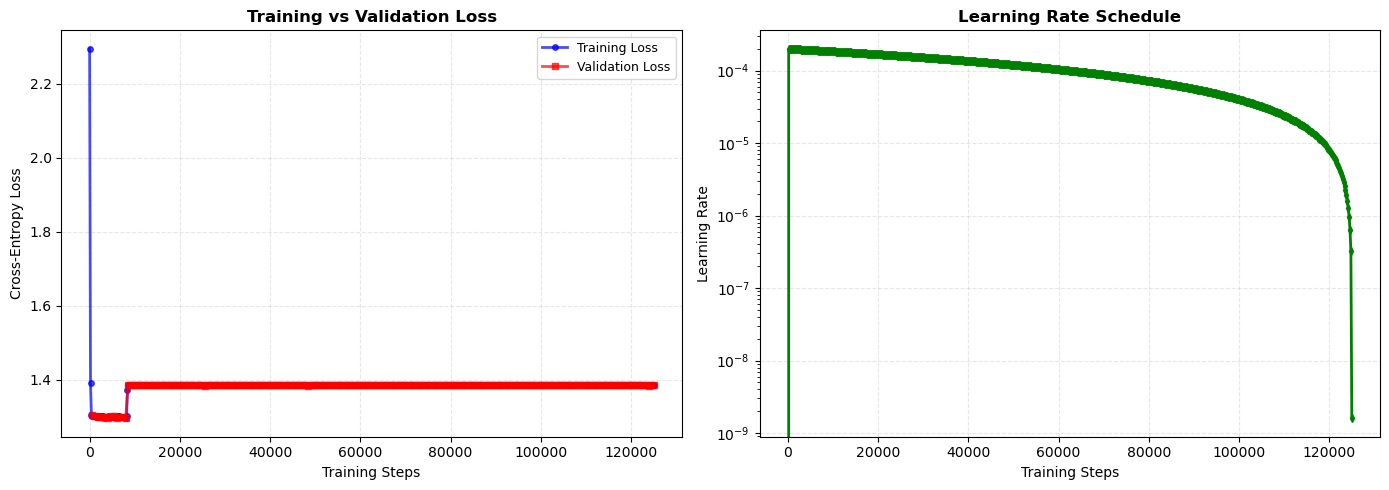


Training Summary:
Final training loss: 1.3849
Final validation loss: 1.3850
Best validation loss: 1.2959
Training history saved to ./dna_bert_final_baseline/training_history.json


In [2]:
baseline_model.train(epochs=500, batch_size=32, lr=2e-4)

### Deletion Model Training

In [7]:
deletion_model.train(epochs=500, batch_size=32, lr=2e-4)


PyTorch: setting up devices
***** Running training *****
  Num examples = 8,000
  Num Epochs = 500
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 125,000
  Number of trainable parameters = 8,620,042


Dataset split: 8000 training, 2000 validation
Model type: With deletions
Vocabulary: ['A', 'C', 'G', 'T', '-']
Starting Training


Step,Training Loss,Validation Loss


KeyboardInterrupt: 

## Visualization | Sequence reconstruction probabilities
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

## Visualization of the baseline model

/data/ceph/hdd/project/node_09/sys_gen_students/2025_2026/p06_better_indel_glm/Sysgen-GLM-for-Indels/fundemental_classes/visualization/sequence_plotter.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


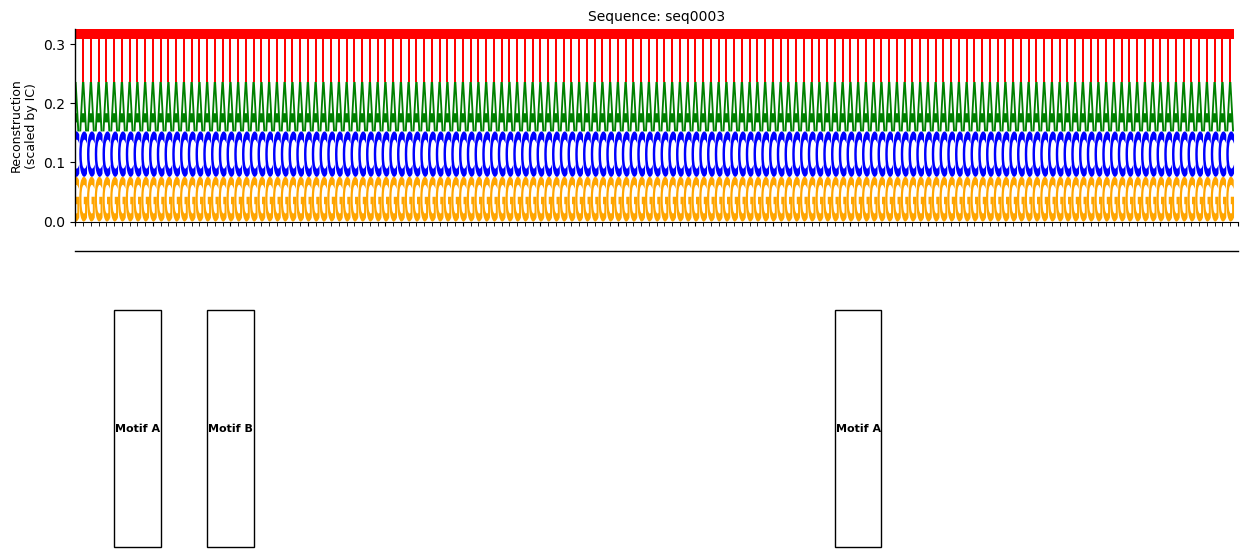

In [5]:
from fundemental_classes.visualization.sequence_plotter import plot
import numpy as np

# this function is for error: ValueError: Shape of passed values is (151, 4), indices imply (151, 5)
def add_deletion_column(prob_matrix):
    prob_matrix = np.asarray(prob_matrix)
    zeros = np.zeros((prob_matrix.shape[0], 1))
    return np.concatenate([prob_matrix, zeros], axis=1)

#normal reconstruction
header = ">seq0003|label=both|posAmotif=5,98|posBmotif=17|gaplength=5|deletions=0"
sequence = "GGTCGATATTCATTCCTGTACTGCTTGATCCACTACCATGTACTTCAATCCTGGCGATGTCTAGTCTCACAGGGAGGTACATATGGTGCAACATTGGAATATTCAACAGGGTATAGGCCTAGACGAGGCATATAAAGCCTGACAACATGT"

prob_matrix = baseline_model.get_full_reconstruction_probs(sequence)
prob_matrix = add_deletion_column(prob_matrix)

plot(header, sequence, prob_matrix, motif_length=6)

## Visualization of the indel model

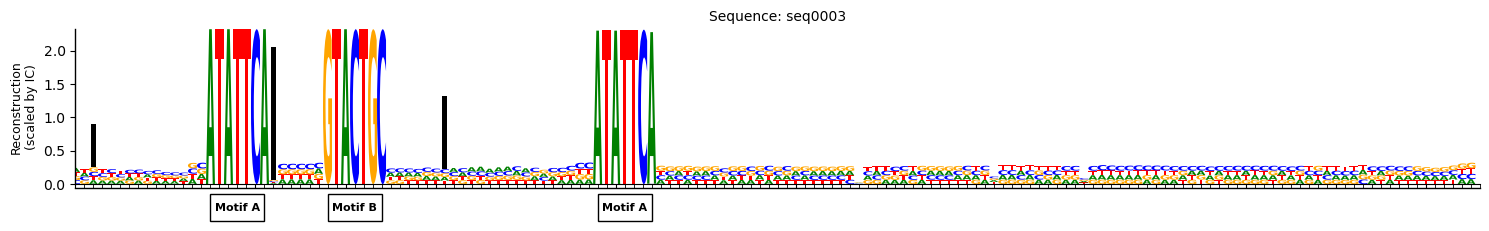

In [3]:
from fundemental_classes.visualization.sequence_plotter import plot

#normal reconstruction
header = "seq0003|label=both|posAmotif=15,58|posBmotif=28|gaplength=5|deletions=6"
sequence = "GG-CCATCTTAGACCATATTCA-CCGCCGTACTGCATGAAG-CTGACGGAGTATGACAATATTCATCACCAGGACACGATCACGCTA-GTACTCAGCGGGCT-CTTCCTTGG-AGGAAGAGGGCCACTACCGGAACCGTTATTAATACGGATTCTT"

prob_matrix = deletion_model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)

/data/ceph/hdd/project/node_09/sys_gen_students/2025_2026/p06_better_indel_glm/Sysgen-GLM-for-Indels/fundemental_classes/visualization/sequence_plotter_new.py:91: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


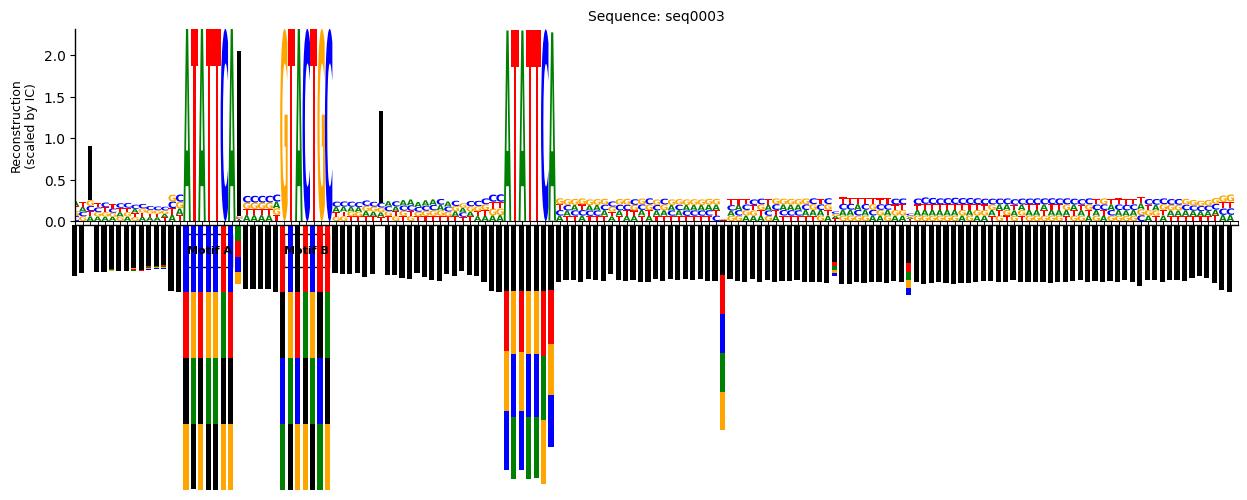

In [7]:
from fundemental_classes.visualization.sequence_plotter_new import plot

#normal reconstruction
header = "seq0003|label=both|posAmotif=15,58|posBmotif=28|gaplength=5|deletions=6"
sequence = "GG-CCATCTTAGACCATATTCA-CCGCCGTACTGCATGAAG-CTGACGGAGTATGACAATATTCATCACCAGGACACGATCACGCTA-GTACTCAGCGGGCT-CTTCCTTGG-AGGAAGAGGGCCACTACCGGAACCGTTATTAATACGGATTCTT"

prob_matrix = deletion_model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)

/data/ceph/hdd/project/node_09/sys_gen_students/2025_2026/p06_better_indel_glm/Sysgen-GLM-for-Indels/fundemental_classes/visualization/sequence_plotter_new.py:91: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


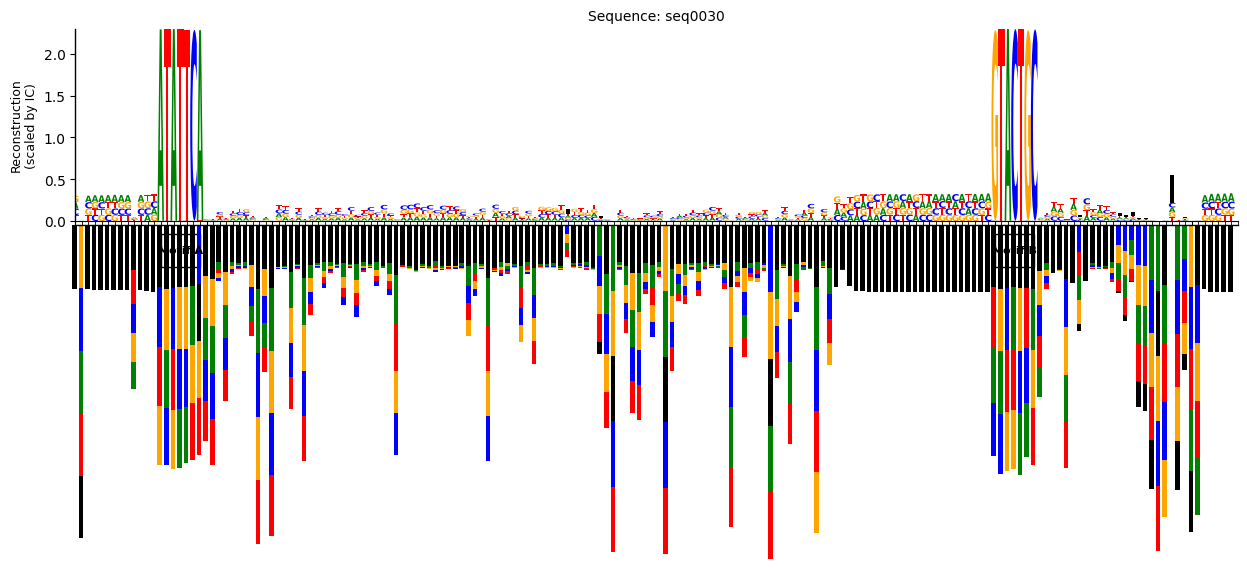

In [3]:
#replace with letter (SNP variation)
header = "seq0030|label=both|posAmotif=13|posBmotif=140|gaplength=100|deletions=27"
sequence = "A-TTGGAGC-CCAATATTCA--CGCCTC-A-CC-A-ACTCG-AGGTTC--GGAAT-TCCCC-T-TCCCAGCCTTG-AGTC--AATTGGGG-TCCTGCTGA-TACAATGG--CT-GCTGTGGACGACTCCTATGATGGGCTGTACTGC--GA-G-GCTTCGGTAGAAT-CGTTATGCC"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)

/data/ceph/hdd/project/node_09/sys_gen_students/2025_2026/p06_better_indel_glm/Sysgen-GLM-for-Indels/fundemental_classes/visualization/sequence_plotter_new.py:91: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


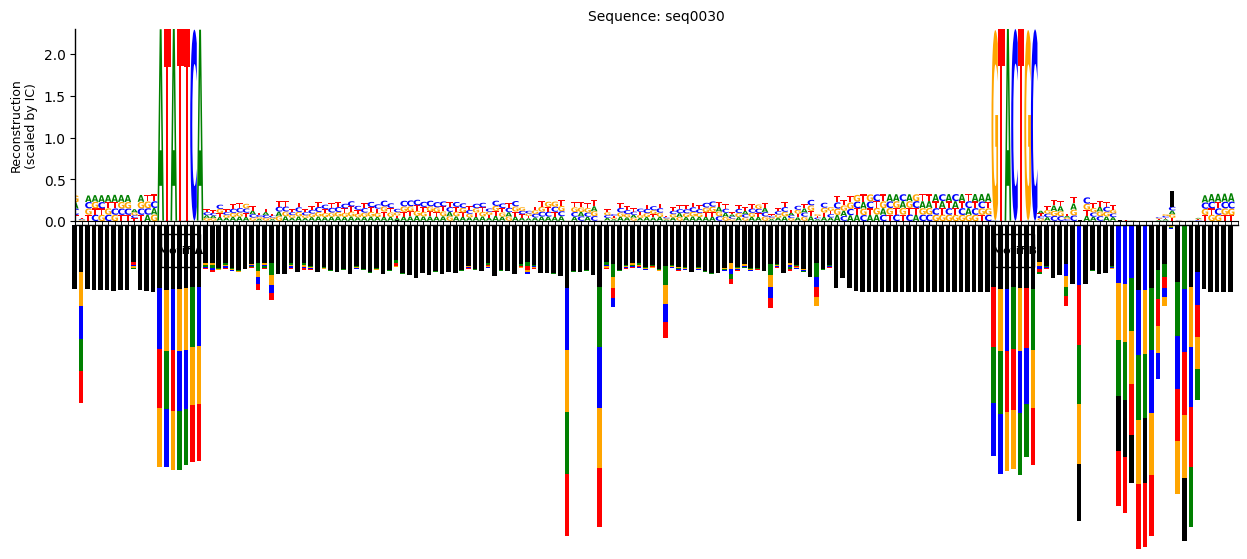

In [4]:
#replace with deletion token (InDel variation)
header = "seq0030|label=both|posAmotif=13|posBmotif=140|gaplength=100|deletions=27"
sequence = "A-TTGGAGC-CCAATATTCA--CGCCTC-A-CC-A-ACTCG-AGGTTC--GGAAT-TCCCC-T-TCCCA-CCTTG-AGTC--AATTGGGG-TCCTGCTGA-TACAATGG--CT-GCTGTGGACGACTCCTATGATGGGCTGTACTGC--GA-G-GCTTCGGTAGAAT-CGTTATGCC"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)

## Visualization | Dependency Map
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\

In [8]:
from fundemental_classes.visualization.heat_map_plotter import DependencyMapGenerator
import numpy as np
import plotly.graph_objects as go
from fundemental_classes.visualization.sequence_logo import SequenceLogo


# a function for creating the heatmap with overlayed logo with input sequence, type of dependency and model
def depencency_map_with_logo(model, sequence, type='snp'):
    dep_gen = DependencyMapGenerator(model, type=type)
    prob_matrix = model.get_full_reconstruction_probs(sequence)
    dep_map = dep_gen.analyze(sequence, show_plot=False)
    L = dep_map.shape[0]
    reconstruction_logo = SequenceLogo.from_reconstruction(prob_matrix)
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            z=dep_map,
            x=np.arange(L),
            y=np.arange(L),
            colorscale="RdBu_r",
        )
    )
    # if the xaxes and yaxes are shown
    fig.update_xaxes(visible=True, scaleanchor="y", constrain="domain")
    fig.update_yaxes(visible=True, autorange="reversed", scaleanchor="x", constrain="domain")
    # Overlay logo at the top 
    fig.add_layout_image(
        source=reconstruction_logo.to_svg(data_url=True),
        xref="x",
        yref="y domain",
        x=-0.5,  # align left edge of first column
        y=1.0,  # top of heatmap domain
        sizex=L,  # span exactly L columns
        sizey=0.10,  # height in domain units (tune)
        xanchor="left",
        yanchor="bottom",
        sizing="stretch",
    )
    fig.update_layout(
        width=900,
        height=900,
        margin=dict(l=20, r=20, t=100, b=20),
    )
    fig.show()


In [16]:
#dependency map for snp 
header = "seq0004|label=both|posAmotif=22,44,85|posBmotif=35,57|gaplength=5|deletions=9"
sequence = "CAGTTTA-TTCTTACCCCCCTAATATTCACGCG-GGTACTGC-CATATTCACCA-GCGTACTGCTTTAC-GGAGACTA-TCTGTAATATTCATAATACGGCTATAACAACAATTTGATGGC-AGCAGGAGAGCAGACCAAAAGTG-GG-TGTTAAGTCA"

dep_map = depencency_map_with_logo(deletion_model, sequence, type='snp')

Computing dependency map...


Map: 100%|██████████| 451/451 [00:00<00:00, 4571.00 examples/s]


In [17]:
#dependency map for indels - reconstruction

header = "seq0004|label=both|posAmotif=22,44,85|posBmotif=35,57|gaplength=5|deletions=9"
sequence = "CAGTTTA-TTCTTACCCCCCTAATATTCACGCG-GGTACTGC-CATATTCACCA-GCGTACTGCTTTAC-GGAGACTA-TCTGTAATATTCATAATACGGCTATAACAACAATTTGATGGC-AGCAGGAGAGCAGACCAAAAGTG-GG-TGTTAAGTCA"

dep_map = depencency_map_with_logo(deletion_model, sequence, type='indel')

Computing dependency map...


Map: 100%|██████████| 151/151 [00:00<00:00, 3675.78 examples/s]


In [ ]:
#dependency map for indels - removal?

header = "seq0004|label=both|posAmotif=22,44,85|posBmotif=35,57|gaplength=5|deletions=9"
sequence = "CAGTTTA-TTCTTACCCCCCTAATATTCACGCG-GGTACTGC-CATATTCACCA-GCGTACTGCTTTAC-GGAGACTA-TCTGTAATATTCATAATACGGCTATAACAACAATTTGATGGC-AGCAGGAGAGCAGACCAAAAGTG-GG-TGTTAAGTCA"

dep_map = depencency_map_with_logo(deletion_model, sequence, type='indel')

Computing dependency map...


Map: 100%|██████████| 151/151 [00:00<00:00, 4268.65 examples/s]
